## Reconstruction of the world map and the paleolocation of IODP Site U1553

This notebook reconstructs global and regional paleogeography at 56 Ma (early Eocene) and calculates the paleoposition of IODP Site U1553.

The primary objective of this notebook is to document the reconstruction workflow and ensure transparency in how paleocoordinates and motion paths were derived.

---

### Software and methodological background

Plate reconstructions were performed using **pygplates**. **GPlates** and its Python interface **pygplates** both are open-source-tools which allow rotation of tectonic plates through time using published global rotation models.

The workflow implemented here strongly follows the structure and methodology presented in the *pygplates-course-2022* repository:

- GitHub: https://github.com/GPlates/pygplates-course-2022  
- EarthByte YouTube tutorial: https://www.youtube.com/watch?v=Wn4zOdjVHfE&t=1034s  

The notebook adapts and simplifies parts of that course for the specific case of Site U1553.

---

### Rotation model and input data

All reconstruction files were obtained from Zenodo:

https://doi.org/10.5281/zenodo.11601026  

The following datasets were used:

- `Zahirovic_etal_2022_OptimisedMantleRef_and_NNRMantleRef.rot`   (global rotation model)

- `Global_EarthByte_GPlates_PresentDay_StaticPlatePolygons.gpmlz`

- `Global_EarthByte_GPlates_PresentDay_Coastlines.gpmlz`

- `Global_EarthByte_GPlates_PresentDay_ContinentalPolygons.gpmlz`

Plate identification wcan be found on:

- `Muller_etal_2019_plateID_list.xlsx`  (Plate ID for Campbell Plateau: 813)

---

### Study site

IODP Site U1553 is located at: Latitude: −52.225° and Longitude: 166.192°. The site lies on the Southern Campbell Plateau in the southwest Pacific sector.  

---

### Output products

This notebook generates the following outputs:

1. Reconstructed paleolocation of Site U1553 at 56 Ma  
2. Reconstructed global and regional maps at 56 Ma  
3. Latitude–time evolution of the site from 56 Ma to present (4 Ma increments)  
4. Site motion path visualization  

In [1]:
import pygplates

objc[18163]: Class QT_ROOT_LEVEL_POOL__THESE_OBJECTS_WILL_BE_RELEASED_WHEN_QAPP_GOES_OUT_OF_SCOPE is implemented in both /opt/anaconda3/envs/pygplates_py313/lib/libQt6Core.6.10.2.dylib (0x117d4d5a0) and /opt/anaconda3/envs/pygplates_py313/lib/libQt5Core.5.15.15.dylib (0x11327d2f8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[18163]: Class KeyValueObserver is implemented in both /opt/anaconda3/envs/pygplates_py313/lib/libQt6Core.6.10.2.dylib (0x117d4d5c8) and /opt/anaconda3/envs/pygplates_py313/lib/libQt5Core.5.15.15.dylib (0x11327d320). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[18163]: Class RunLoopModeTracker is implemented in both /opt/anaconda3/envs/pygplates_py313/lib/libQt6Core.6.10.2.dylib (0x117d4d618) and /opt/anaconda3/envs/pygplates_py313/lib/libQt5Core.5.15.15.dylib (0x11327d370). This may cause spurious casting failures an

### 1. Reconstructed paleolocation of Site U1553 at 56 Ma

In [2]:
# Name of the input rotation file
rotation_filename = 'GeoData/FeatureCollections/Rotations/Zahirovic_etal_2022_OptimisedMantleRef_and_NNRMantleRef.rot'
static_polygon_file = 'GeoData/Global_EarthByte_GPlates_PresentDay_StaticPlatePolygons.gpmlz'

In [3]:
# Input parameters to define how the reconstruction is made

points = []
points.append((166.192, -52.225,)) # IODP U1553

# --- Create a simple point feature
point_features = []
for lon, lat in points:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))   # Note: we specify latitude first here! 
    point_features.append(point_feature)

# --- Assign the plate IDs, based on the static polygons. With this line of code, the plateID will be automatically assigned. No manual search needed.
point_features_cc = pygplates.partition_into_plates(static_polygon_file, rotation_filename, 
                                                    point_features, properties_to_copy = [pygplates.PartitionProperty.reconstruction_plate_id])

# --- Define the reconstruction time
reconstruction_time = 56.

# --- Reconstruct the point features.
reconstructed_feature_geometries = []
pygplates.reconstruct(point_features_cc, rotation_filename, reconstructed_feature_geometries, reconstruction_time)

# Loop through and print coordinates
for reconstructed_feature_geometry in reconstructed_feature_geometries:

    reconstructed_coords_lat_lon = reconstructed_feature_geometry.get_reconstructed_geometry().to_lat_lon()
    presentday_coords_lat_lon = reconstructed_feature_geometry.get_present_day_geometry().to_lat_lon()
    
    # Print out the present-day and reconstructed coordinates
    print('Present-day point: %.1f°E, %.1f°N' % (presentday_coords_lat_lon[1], presentday_coords_lat_lon[0]))
    print('Reconstructed point at %s Ma:  %.1f°E, %.1f°N \n' % (reconstructed_feature_geometry.get_reconstruction_time(), 
                                                                reconstructed_coords_lat_lon[1], reconstructed_coords_lat_lon[0]))

Present-day point: 166.2°E, -52.2°N
Reconstructed point at 56.0 Ma:  -179.6°E, -61.6°N 



### 2. Reconstructed global and regional maps at 56 Ma

In [4]:
#Reconstruction of coastlines
# --- Names of input files
coastline_filename = 'GeoData/Global_EarthByte_GPlates_PresentDay_Coastlines.gpmlz'
rotation_filename = 'GeoData/FeatureCollections/Rotations/Zahirovic_etal_2022_OptimisedMantleRef_and_NNRMantleRef.rot'

# --- Reconstruction parameters
reconstruction_time = 56
anchor_plate = 0

# --- Save ouput file as a shapefile (instead of saving it to an empty list)
output_reconstructed_feature_filename = '56_reconstructed_coastlines.shp'

In [5]:
#Reconstruction of continents
# --- Names of input files
continental_filename = 'GeoData/Global_EarthByte_GPlates_PresentDay_ContinentalPolygons.gpmlz'
rotation_filename = 'GeoData/FeatureCollections/Rotations/Zahirovic_etal_2022_OptimisedMantleRef_and_NNRMantleRef.rot'

# --- Reconstruction parameters
reconstruction_time = 56
anchor_plate = 0

# --- Save ouput file as a shapefile (instead of saving it to an empty list)
output_reconstructed_feature_filename = '56_reconstructed_continents.shp'

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon
import numpy as np
%matplotlib inline

In [7]:
output_reconstructed_feature_filename = '56_reconstructed_coastlines.shp'
output_paleo_continents = '56_reconstructed_continents.shp'

Possible issue encountered when converting Shape #876 to GeoJSON: Shapefile format requires that all polygon interior holes be contained by an exterior ring, but the Shape contained interior holes (defined by counter-clockwise orientation in the shapefile format) that were orphaned, i.e. not contained by any exterior rings. The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #876 to GeoJSON: Shapefile format requires that all polygon interior holes be contained by an exterior ring, but the Shape contained interior holes (defined by counter-clockwise orientation in the shapefile format) that were orphaned, i.e. not contained by any exterior rings. The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


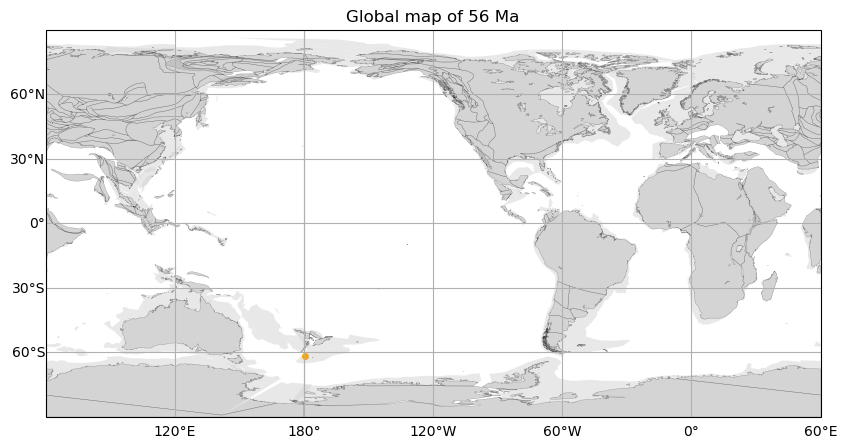

In [8]:
fig = plt.figure(figsize=(10, 15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120))

#loading recontructed continents
shp_cont = shpreader.Reader(output_paleo_continents)
ft_cont = cfeature.ShapelyFeature(shp_cont.geometries(), crs=ccrs.PlateCarree())
ax.add_feature(ft_cont, facecolor='lightgrey', alpha=0.5)

#loading recontructed coastlines
ax.plot([-179.6], [-61.6], marker=".",color="orange", markersize=6, transform=ccrs.PlateCarree())
shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())
ax.add_feature(ft_coast, facecolor= 'darkgrey',edgecolor='black', linewidth=0.3, alpha=0.3)
ax.set_global()

#Location of IODP Site U1553 at 56 Ma
ax.plot([-179.6], [-61.6], marker=".",color="orange", markersize=8, transform=ccrs.PlateCarree())

#Gridlines and labels
ax.gridlines( linewidth=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Global map of 56 Ma')
plt.show()

Possible issue encountered when converting Shape #876 to GeoJSON: Shapefile format requires that all polygon interior holes be contained by an exterior ring, but the Shape contained interior holes (defined by counter-clockwise orientation in the shapefile format) that were orphaned, i.e. not contained by any exterior rings. The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #876 to GeoJSON: Shapefile format requires that all polygon interior holes be contained by an exterior ring, but the Shape contained interior holes (defined by counter-clockwise orientation in the shapefile format) that were orphaned, i.e. not contained by any exterior rings. The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


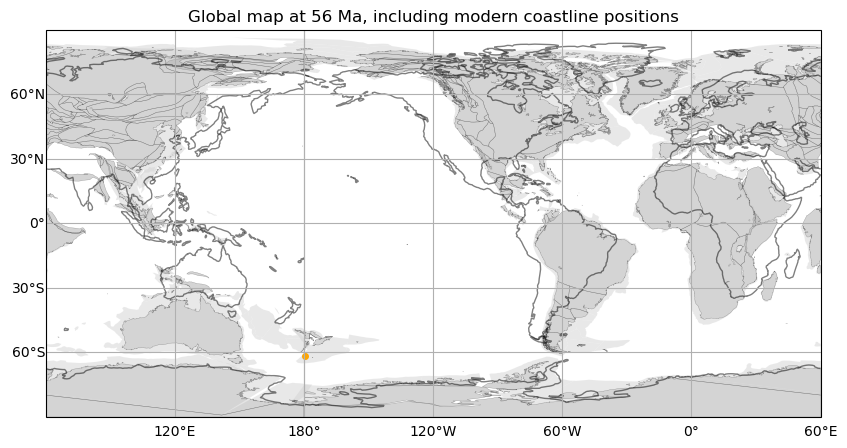

In [15]:
fig = plt.figure(figsize=(10, 15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120))

#loading recontructed continents
shp_cont = shpreader.Reader(output_paleo_continents)
ft_cont = cfeature.ShapelyFeature(shp_cont.geometries(), crs=ccrs.PlateCarree())
ax.add_feature(ft_cont, facecolor='lightgrey', alpha=0.5)

#loading recontructed coastlines
shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())
ax.add_feature(ft_coast, facecolor= 'darkgrey',edgecolor='black', linewidth=0.3, alpha=0.3)

ax.set_global()
ax.coastlines(resolution="110m",alpha= 0.5)  #Loading modern coastlines

#Location of IODP Site U1553 at 56 Ma
ax.plot([-179.6], [-61.6], marker=".",color="orange", markersize=8, transform=ccrs.PlateCarree())

# Gridlines and labels
ax.gridlines( linewidth=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Global map at 56 Ma, including modern coastline positions')
plt.show()

Possible issue encountered when converting Shape #876 to GeoJSON: Shapefile format requires that all polygon interior holes be contained by an exterior ring, but the Shape contained interior holes (defined by counter-clockwise orientation in the shapefile format) that were orphaned, i.e. not contained by any exterior rings. The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #876 to GeoJSON: Shapefile format requires that all polygon interior holes be contained by an exterior ring, but the Shape contained interior holes (defined by counter-clockwise orientation in the shapefile format) that were orphaned, i.e. not contained by any exterior rings. The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


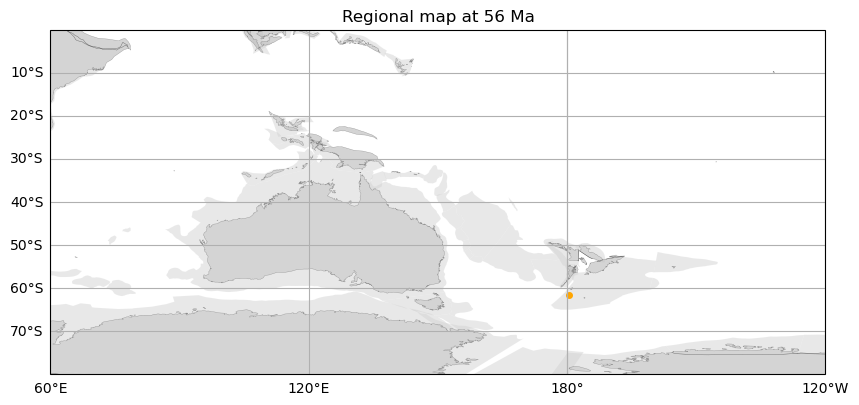

In [10]:
fig = plt.figure(figsize=(10, 15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([60, 240, -80, 0], crs=ccrs.PlateCarree())

#loading recontructed continents
shp_cont = shpreader.Reader(output_paleo_continents)
ft_cont = cfeature.ShapelyFeature(shp_cont.geometries(), crs=ccrs.PlateCarree())
ax.add_feature(ft_cont, facecolor='lightgrey', alpha=0.5)

#loading recontructed coastlines
shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())
ax.add_feature(ft_coast, facecolor= 'darkgrey',edgecolor='black', linewidth=0.3, alpha=0.3)

#Location of IODP Site U1553 at 56 Ma
ax.plot([-179.6], [-61.6], marker=".",color="orange",markersize=8, transform=ccrs.PlateCarree())

# Gridlines and labels
ax.gridlines( linewidth=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Regional map at 56 Ma')
plt.show()

### 3. Latitude–time evolution of the site from 56 Ma to present 

In [11]:
rotation_model = pygplates.RotationModel(rotation_filename)
SeedPoint = (-52.225,166.192)
MovingPlate = 813
RelativePlate = 0
times = np.arange(0,60,4.) #4ma increments

# Create a motion path feature
digitisation_time = 0
seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint]) 
motion_path_feature = pygplates.Feature.create_motion_path(
        seed_points_at_digitisation_time,
        times,
        valid_time=(200, 0),
        relative_plate=RelativePlate,
        reconstruction_plate_id = MovingPlate)

# Create the shape of the motion path
reconstruction_time = 0
reconstructed_motion_paths = []
pygplates.reconstruct(
        motion_path_feature, rotation_model, reconstructed_motion_paths, reconstruction_time,
        reconstruct_type=pygplates.ReconstructType.motion_path)

# get the reconstructed coordinates into numpy arrays
for reconstructed_motion_path in reconstructed_motion_paths:
    trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
 

In [12]:
trail

array([[ -61.59522512, -179.57835778],
       [ -60.13666144, -179.63628063],
       [ -58.907984  ,  179.59829812],
       [ -58.44224472,  179.19987802],
       [ -58.05520775,  178.54165784],
       [ -57.87263311,  178.65494127],
       [ -57.55362345,  178.41796053],
       [ -56.83282701,  177.4372576 ],
       [ -56.11940888,  176.12852646],
       [ -55.43265879,  174.48511305],
       [ -54.90388743,  172.69769589],
       [ -54.39194134,  170.93697569],
       [ -53.62326124,  169.26723633],
       [ -52.90906202,  167.72770672],
       [ -52.225     ,  166.192     ]])

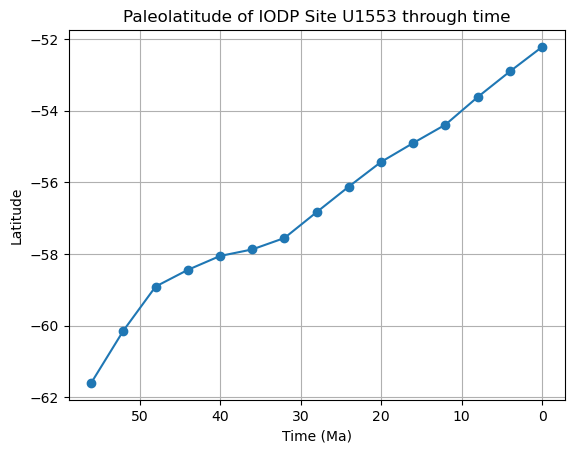

In [13]:
plt.plot(times,np.flipud(trail[:,0]),
        marker="o", linewidth=1.5)
plt.title('Paleolatitude of IODP Site U1553 through time')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()

### 4. Site motion path visualization  

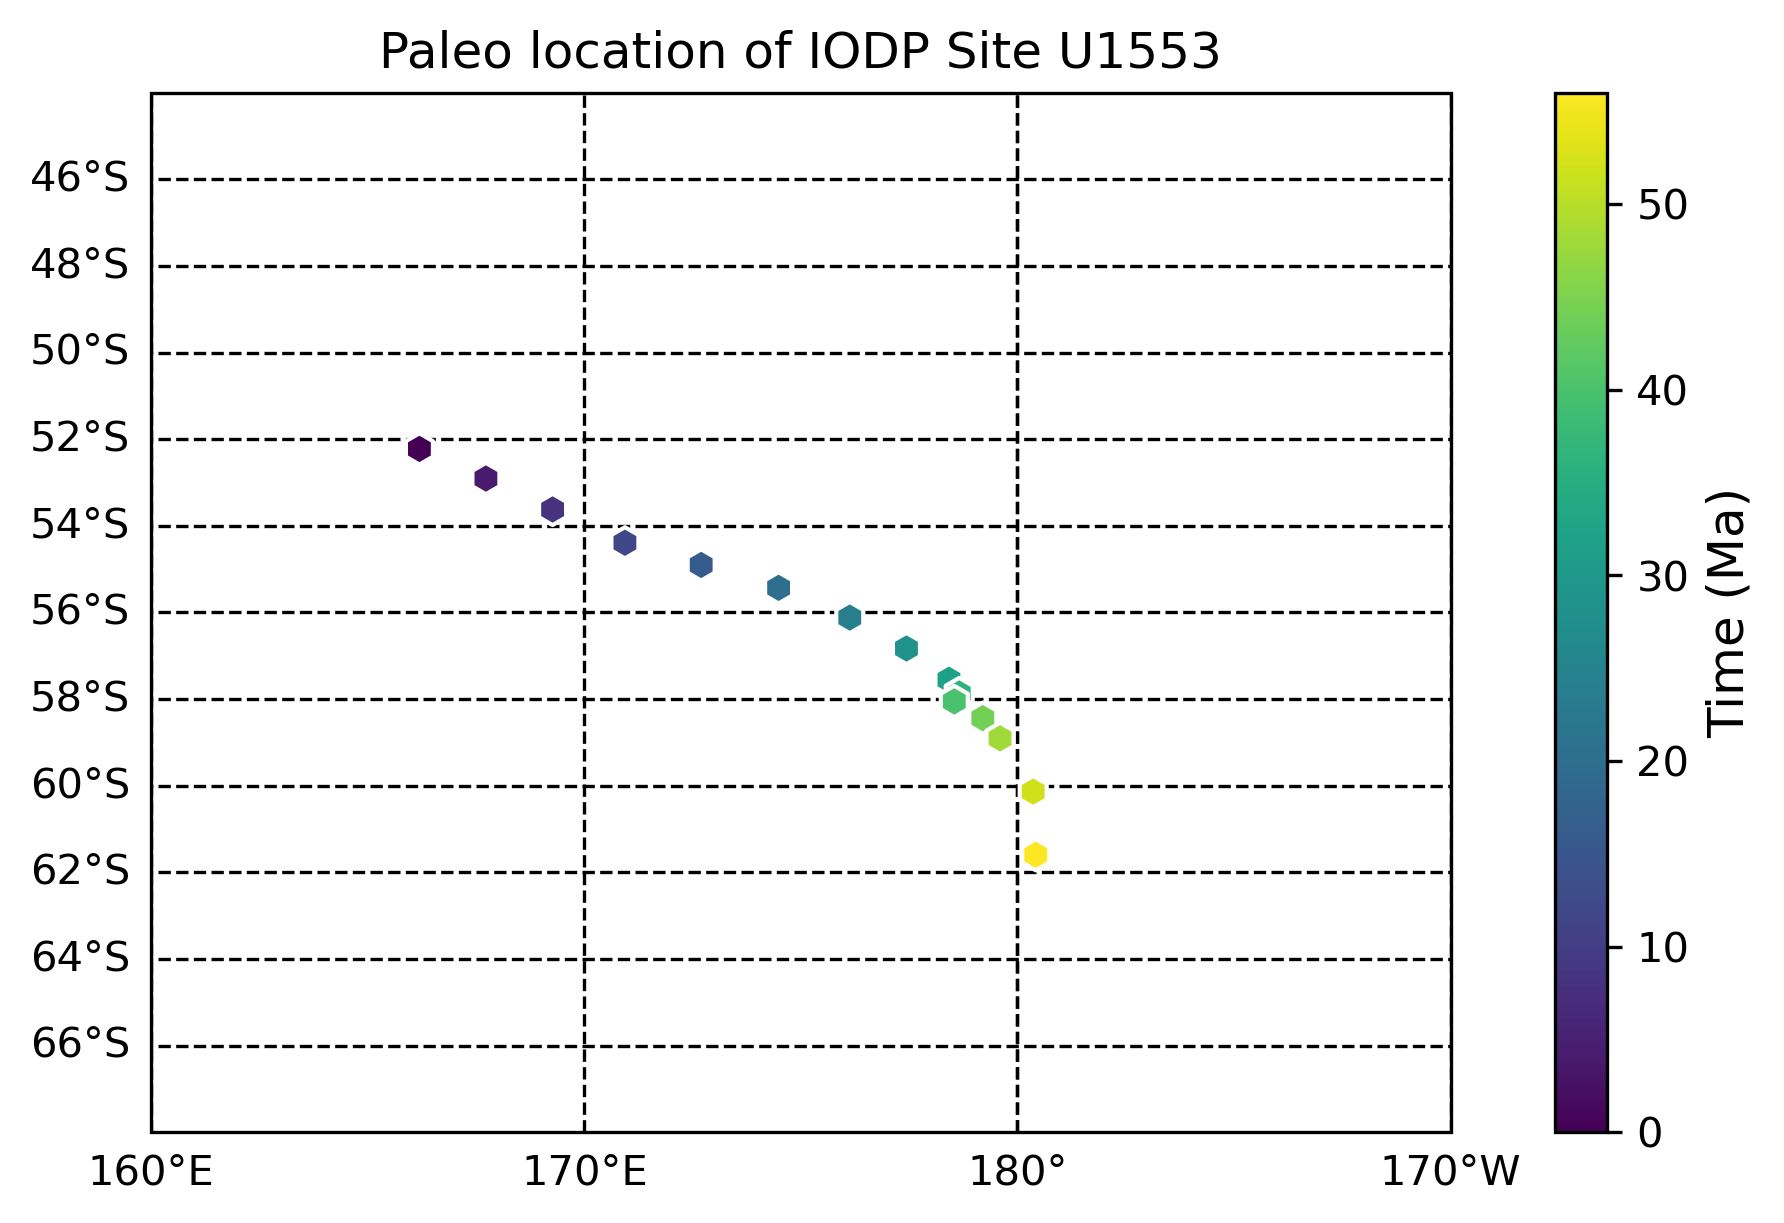

In [14]:
fig = plt.figure(figsize=(7.5,4.5), dpi=300)

# Center projection on Pacific (180°)
ax_map = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

# Extent crossing dateline
ax_map.set_extent([160, 190, -68, -44], crs=ccrs.PlateCarree())

# Gridlines
gl = ax_map.gridlines(color='black',linestyle='--',xlocs=np.arange(-180, 181, 10),ylocs=np.arange(-90, 90, 2),draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot hotspot trail
x, y = np.flipud(trail[:,1]), np.flipud(trail[:,0])


l1 = ax_map.scatter(x, y, 56,c=times,marker='h',cmap=plt.cm.viridis,edgecolor='w',transform=ccrs.PlateCarree(),zorder=3)

fig.colorbar(l1, ax=ax_map, pad=0.06).set_label('Time (Ma)', fontsize=12)
plt.title('Paleo location of IODP Site U1553')

plt.show()